# Import Libraries and Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Including dependencies & installs for Automatic EDA

### Run the below code to be able to produce the automatic EDA insights

# Install New Packages if they are not previously installed
#!pip install ydata-profiling
#!pip install sweetviz
#!pip install scikit-plot
#!pip install numpy
#!pip install pandas
#!pip install scikit-learn

#import Profile Reporting and SV to Analyze the Data
from ydata_profiling import ProfileReport
import sweetviz as sv

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting
from sklearn import linear_model # for linear regression if necessary
from sklearn.linear_model import LogisticRegressionCV # for Lasso Logistic Regression
from sklearn.model_selection import cross_validate, train_test_split, cross_val_score # for splitting and cross validating data

# import various sklearn metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# import DT modeling
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# import SVM modeling
from sklearn.svm import SVC

# Test libraries
from scipy.stats import ks_2samp
# import scikitplot as skplt # doesn't seem to be in use

# import Profile Reporting and SV to Analyze the Data
from ydata_profiling import ProfileReport
import sweetviz as sv

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# importing train set
train_data = pd.read_csv("train.csv")

# only displaying the tail rows
train_data.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [4]:
# importing test set 
test_data = pd.read_csv("test.csv")

# display the header rows
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

### Variable Definitions

#### - PassengerID (Passenger ID)

#### - Survival (Did the passangerer survive?): 0 = No, 1 = Yes 

#### - Pclass (Ticket class): 1 = 1st, 2 = 2nd, 3 = 3rd 

#### - Name (Passenger Name)

#### - Sex: Male, Female

#### - Age: In years 

#### - SibSp (number of siblings / spouses aboard the Titanic) 

#### - Parch (number of parents / children aboard the Titanic)

#### - Ticket (Ticket number) 

#### - Fare (Passenger fare)

#### - Cabin (Cabin number)

#### - Embarked (Port of Embarkation): C=Cherbourg, Q=Queenstown, S=Southampton 

# Auto Exploratory Data Analysis (EDA)
- if you skipped running first cell then skip this run

In [5]:
# Exploring Automatic EDA tools to discover insight from the get-go!
profile = ProfileReport(train_data, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 94.51it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
#File will be uploaded ton kaggle working dir - download and access from here for more Automated EDA
report = sv.analyze(train_data)
#display the report
report.show_html('Titanic.html')

                                             |                                             | [  0%]   00:00 ->…

Report Titanic.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### This tells us the following:
#### 1.) The target variable is unbalanced at 549 did not survive to 342 survived.
#### 2.) The word cloud shows titles like master, mrs., miss, and mr. which could be important in determining survival based on social class/title.
#### 3.) Female to Male ratio is also imbalanced at 314:577 respectively.
#### 4.) Nearly 20% of age data is missing, and will need to be imputed since it is too much to drop or an ML model could be built separate to then fill age with predictions
#### 5.) SibSp (number of siblings / spouses aboard the Titanic) & Parch (number of parents / children aboard the Titanic) are predominantly zero. We feel these variables would be better represented as binary flags since I feel that the yes/no relationship is more important than the size/count of how many siblings or how many children you have
#### 6.) We will not use ticket number as a feature due to it being a highly distinct text variable.
#### 7.) Fare wll most likely be best at determining class which leads to preferential treatment in lifeboat seat rationing
#### 8.) We did a text extraction on the cabin column to bin classes by floor letter to limit high ordinality
#### 9.) We one hot encoded Embarked and dropped class S as the Reference group to compare against more uncommon classes like "C" & "Q"
#### 10.) Pclass will need to be converted to text and dropped at class 3 so the effect of better seating/class can be analyzed by the model.

# File Joining
### Preprocessing testing data simultaneously with our training. Afterward we simply split based on indicator column values

In [7]:
#Needed to dropna for two values here to also drop the corresponding y values
train_data.dropna(subset=['Embarked'], inplace=True)
test_data.dropna(subset=['Embarked'], inplace=True)

'''
# Setting y first so it only takes from training
y_train = train_data[['Survived']]

# Aligning both files before merging
train_data1 = train_data[['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked']]
test_data1 = test_data[['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked']]

# Merging both files during cleaning and preprocessing and later separating before training
X = pd.concat([train_data1.assign(ind="train"), test_data1.assign(ind="test")])

# Field "ind" will indicate what belongs to X_train & X_test
X
'''
# above was only used for the kaggle submission
# We are going to split the training data to be able to evaluate how our models fit (under/over) 
# since the kaggle test set is missing the actuals due to anti-cheat
X = train_data[['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked']]
y = train_data[['Survived']]

Test_X = test_data[['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked']]

# Preprocessing

In [8]:
# Redefining as str to later one hot encode
X["Pclass"] = X["Pclass"].astype(str)
Test_X["Pclass"] = Test_X["Pclass"].astype(str)

In [9]:
# Binarization of variables that determines whether or not they have a sibling or spouse with and if they have a parent 
# or child with. This would be and ideal way to classify whose a parent vs child and sib vs spouse to create some higher 
# impact features although the drawback is that the age that would be set to assign a person to child vs parent and 
# spouse vs sibling could either return high type I or high type II error based on if we set it too low or too high.
X['Parch'] = X['Parch'].apply(lambda x: 1 if x > 0 else 0)
X['SibSp'] = X['SibSp'].apply(lambda x: 1 if x > 0 else 0)
Test_X['Parch'] = Test_X['Parch'].apply(lambda x: 1 if x > 0 else 0)
Test_X['SibSp'] = Test_X['SibSp'].apply(lambda x: 1 if x > 0 else 0)

### Filling/Dropping nulls

In [10]:
# Only 2 nulls so makes sense to drop
X.dropna(subset=['Embarked'], inplace=True)
Test_X.dropna(subset=['Embarked'], inplace=True)

In [11]:
# Filling nulls with Unknown to later one hot encode and drop to have as the reference group since a random pool of cabins 
# that were originally unlisted could serve as a pretty average baseline depending on what they originaly were, 
# which could also get tricky if they were unbalanced and since we don't know this it could be a bad idea
X.Cabin = X.Cabin.fillna("Unknown")
Test_X.Cabin = X.Cabin.fillna("Unknown")

In [12]:
# Want to use the mean age as a placeholder for imputation as my original plan is to use predictions from a separate 
# ML model to impute better
X.Age = X.Age.fillna(X.Age.mean())
Test_X.Age = Test_X.Age.fillna(X.Age.mean())

# this was only null in the test set, but I suppose could also be potentially applied to another model
# X_test[X_test['Fare'].isnull()] only one value was null here but since it came from the test set we cant drop
X.Fare = X.Fare.fillna(X.Fare.mean())
Test_X.Fare = Test_X.Fare.fillna(X.Fare.mean())

### Feature Engineering

In [13]:
# This takes the first letter of cabin and categorizes the variable
X['Cabin_Floor'] = X['Cabin'].str[0]
Test_X['Cabin_Floor'] = Test_X['Cabin'].str[0]

In [14]:
# Feature Engineering Titles from Names
X['Title'] = np.where(X['Name'].str.contains(r'Mr\.'), 'Mr.',
                np.where(X['Name'].str.contains(r'Miss\.'), 'Miss.', # used the other french and spanish prefixes found to denote Miss and Mrs as well
                np.where(X['Name'].str.contains(r'Mrs\.'), 'Mrs.',
                np.where(X['Name'].str.contains(r'Dr\.'), 'Dr.',
                np.where(X['Name'].str.contains(r'Master'), 'Master',
                np.where(X['Name'].str.contains(r'Rev\.'), 'Rev.',
                # query runs faster when more commonly occuring values are towards the top (Less Looping)
                np.where(X['Name'].str.contains(r'Col'), 'Colonel', # could later bin these three as high ranking military
                np.where(X['Name'].str.contains(r'Capt'), 'Captain',
                np.where(X['Name'].str.contains(r'Major'), 'Major',
                np.where(X['Name'].str.contains(r'Countess'), 'Countess', #(English/Dutch)
                np.where(X['Name'].str.contains(r'Mlle'), 'Miss.', # mademoiselle (French)
                np.where(X['Name'].str.contains(r'Ms'), 'Miss.', # including last since theres a low probability a name could have Ms
                np.where(X['Name'].str.contains(r'Mme\.'), 'Mrs.', # Madame (French)
                np.where(X['Name'].str.contains(r'Don\.'), 'Mr.', # Lord or a formal sir (Spanish)
                np.where(X['Name'].str.contains(r'Dona\.'), 'Mrs.', # "honorific term to refer to a mature woman" (Spanish)
                np.where(X['Name'].str.contains(r'Jonkheer'), 'Jonkheer.', # 
                np.where(X['Name'].str.contains(r'Sir\.'), 'Mr.', # Honorable
                np.where(X['Name'].str.contains(r'Lady\.'), 'Miss.', # Honorable
                         'Other'))))))))))))))))))
X.drop(columns=['Name'], inplace=True)
# thinking of first binning this as is with Mr as the reference group to see what people get better preferential treatment than the men of this time
# could later bin this by honorable title and without as the reference group 
# or could further bin it by type of title i.e. royalty, military, professional (Dr,Rev,Master), & formal

Test_X['Title'] = np.where(Test_X['Name'].str.contains(r'Mr\.'), 'Mr.',
                np.where(Test_X['Name'].str.contains(r'Miss\.'), 'Miss.', # used the other french and spanish prefixes found to denote Miss and Mrs as well
                np.where(Test_X['Name'].str.contains(r'Mrs\.'), 'Mrs.',
                np.where(Test_X['Name'].str.contains(r'Dr\.'), 'Dr.',
                np.where(Test_X['Name'].str.contains(r'Master'), 'Master',
                np.where(Test_X['Name'].str.contains(r'Rev\.'), 'Rev.',
                # query runs faster when more commonly occuring values are towards the top (Less Looping)
                np.where(Test_X['Name'].str.contains(r'Col'), 'Colonel', # could later bin these three as high ranking military
                np.where(Test_X['Name'].str.contains(r'Capt'), 'Captain',
                np.where(Test_X['Name'].str.contains(r'Major'), 'Major',
                np.where(Test_X['Name'].str.contains(r'Countess'), 'Countess', #(English/Dutch)
                np.where(Test_X['Name'].str.contains(r'Mlle'), 'Miss.', # mademoiselle (French)
                np.where(Test_X['Name'].str.contains(r'Ms'), 'Miss.', # including last since theres a low probability a name could have Ms
                np.where(Test_X['Name'].str.contains(r'Mme\.'), 'Mrs.', # Madame (French)
                np.where(Test_X['Name'].str.contains(r'Don\.'), 'Mr.', # Lord or a formal sir (Spanish)
                np.where(Test_X['Name'].str.contains(r'Dona\.'), 'Mrs.', # "honorific term to refer to a mature woman" (Spanish)
                np.where(Test_X['Name'].str.contains(r'Jonkheer'), 'Jonkheer.', # 
                np.where(Test_X['Name'].str.contains(r'Sir\.'), 'Mr.', # Honorable
                np.where(Test_X['Name'].str.contains(r'Lady\.'), 'Miss.', # Honorable
                         'Other'))))))))))))))))))
Test_X.drop(columns=['Name'], inplace=True)

### Outlier Removal

In [15]:
# We left in the 20 outliers from Fare as they are still pretty spread, and although not very drastic,
# they are representative that more money spent better assures survival. 
# This also was the only outlier worth checking for removal.
print(train_data[train_data.Fare > ((train_data.Fare.std() * 3) + train_data.Fare.mean())].value_counts("Survived"))
print(f'\nOutlier break point: {(X.Fare.std() * 3)+X.Fare.mean()}')
print(f'\nHighest Excession: {X.Fare.max()}')

Survived
1    14
0     6
Name: count, dtype: int64

Outlier break point: 181.18919382751437

Highest Excession: 512.3292


### Dropping Useless Columns

In [16]:
# Dropping:
# ticket due to high cardinality
# cabin and Sex due to feature extraction with cabin floor and title (mr mrs and other titles presume the sex already)
X.drop(columns=['Ticket','Cabin', 'Sex'], inplace=True)
Test_X.drop(columns=['Ticket','Cabin', 'Sex'], inplace=True)

# Standardizing and Encoding

In [17]:
print('Saved the numerical Standard Deviations before standardizing for later interpretation')
print("Checked number of dummy variables to be generated and scaled the rest \n")
dummy_cols = 0
for col in X.columns:
    if X[col].dtype == 'object' and col != "ind":
        print('Unique Values:',col,X[col].nunique())
        dummy_cols += X[col].nunique() - 1
    elif X[col].nunique()==2:
        print(col,'is Binary')
        pass
    else:
        print('Standard Dev',col,X[col].std())
        X[col] = (X[col] - X[col].mean()) / X[col].std()
print(f"\nWill be adding {dummy_cols} dummy columns to the model after RGs are taken out")
        
# Every 50 dollars of Fare raises prediction impact by corresponding theta/coefficient in the model
# Every 13 years of Age raises prediction impact by corresponding theta/coefficient in the model

for col in Test_X.columns:
    if Test_X[col].dtype == 'object' and col != "ind":
        print('Unique Values:',col,Test_X[col].nunique())
        dummy_cols += Test_X[col].nunique() - 1
    elif Test_X[col].nunique()==2:
        print(col,'is Binary')
        pass
    else:
        print('Standard Dev',col,X[col].std())
        Test_X[col] = (Test_X[col] - Test_X[col].mean()) / Test_X[col].std()

Saved the numerical Standard Deviations before standardizing for later interpretation
Checked number of dummy variables to be generated and scaled the rest 

Unique Values: Pclass 3
Standard Dev Age 12.968346294351784
SibSp is Binary
Parch is Binary
Standard Dev Fare 49.69750431670801
Unique Values: Embarked 3
Unique Values: Cabin_Floor 9
Unique Values: Title 11

Will be adding 22 dummy columns to the model after RGs are taken out
Unique Values: Pclass 3
Standard Dev Age 0.9999999999999991
SibSp is Binary
Parch is Binary
Standard Dev Fare 0.9999999999999994
Unique Values: Embarked 3
Unique Values: Cabin_Floor 9
Unique Values: Title 7


In [18]:
# Getting dummy variables from X and assigning respective prefixs 
## Uncomment to include gender
X = pd.get_dummies(X, columns=['Pclass', 
                               #'Sex',
                               'Embarked','Cabin_Floor', 'Title'], 
                       prefix=['Class',
                               #'',
                               'From','Floor','Title'])
X.head()

Test_X = pd.get_dummies(Test_X, columns=['Pclass', 
                               #'Sex',
                               'Embarked','Cabin_Floor', 'Title'], 
                       prefix=['Class',
                               #'',
                               'From','Floor','Title'])

### Dropping Columns for Categorical Reference Groups: 
- (Lowest class | Male | From Southampton | Mr | Unknown Floor)

In [19]:
# uncomment male if keeping gender
X.drop(columns=['Class_3',
                #'_male',
                'From_S','Title_Mr.','Floor_U'], inplace=True)

Test_X.drop(columns=['Class_3',
                #'_male',
                'From_S','Title_Mr.','Floor_U'], inplace=True)

In [20]:
#X = X.astype(int)
for col in X.columns:
    if X[col].nunique() == 2 and col != "ind":
        try:
            X[col] = X[col].astype(int)
        except:
            print('Error Somehow Occurred')
X.head()

for col in Test_X.columns:
    if Test_X[col].nunique() == 2 and col != "ind":
        try:
            Test_X[col] = Test_X[col].astype(int)
        except:
            print('Error Somehow Occurred')

# Splitting And Training
- splitting to be able to evaluate overfitting of our models

In [21]:
# Below is commented out code used for evaluating against kaggle test data
'''
# Splitting preprocessed X data
X_test, X_train = X[X["ind"].eq("test")], X[X["ind"].eq("train")]
#X_test = df.loc[df['ind'] == "test", :]
#X_train = df.loc[df['ind'] == "train", :]

# Removing placeholder value before modeling
X_test.drop(columns=['ind'], inplace=True)
X_train.drop(columns=['ind'], inplace=True)
'''
### Splitting on the training data only since it is the only data with y actuals
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #, random_state=42) # Remove left comment to make reproducible 

In [22]:
# This is a version of Logistic Regression with Cross Validation in it. The default cross validation is 5 fold. 
# Set pentalty to 'l1'. This applies L1 regularization (Lasso) which encourages shrink some coefficients to zero to effectively selecting features.
# Set Cs to 30. C is the inverse of the regularization strength. Smaller C means stronger regularization. Larger C means weaker regularization.
# We don't have that many features so 30 is ok, but we could move it down if we felt there was a risk of overfitting.  
# Solver to 'liblinear which pecifies the optimization algorithm. liblinear supports L1 and works well for smaller datasets.
model = LogisticRegressionCV(penalty='l1',Cs = 30, solver = 'liblinear',random_state=42) #fixing random_state so identical results had for each execution

# fiting model on the training data
model.fit(X_train,y_train)

LogisticRegressionCV(Cs=30, penalty='l1', random_state=42, solver='liblinear')

# Scoring & Further Model Eval

In [23]:
X_test.columns[X_test.isnull().any()]

Index([], dtype='object')

In [24]:
# Predicting the test data set
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

In [25]:
## if on kaggle highlight below and run "ctrl-k, u" to uncomment and then unquote the kaggle code snippets above

## Outputting to File
# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred})
# output.to_csv('submission.csv', index=False)
# print("Submission saved")

In [26]:
#Showing the Final Selection of the Variables that were kept from the Lasso Penalty 
var_coefs = {}
for coef,col in zip(model.coef_[0],X.columns):
    print(f'Coefficient of {col}: {coef}')
    var_coefs[col]=coef
    

Coefficient of Age: -0.4864123349893094
Coefficient of SibSp: -0.28551538848916325
Coefficient of Parch: -0.6531169812816235
Coefficient of Fare: 0.13972870639032886
Coefficient of Class_1: 1.7656319529478746
Coefficient of Class_2: 1.032278663968981
Coefficient of From_C: 0.49564463302677286
Coefficient of From_Q: 0.2789174625231634
Coefficient of Floor_A: 0.0
Coefficient of Floor_B: 0.320797013468789
Coefficient of Floor_C: 0.0
Coefficient of Floor_D: 0.7308594009223104
Coefficient of Floor_E: 1.234595735728661
Coefficient of Floor_F: 0.0
Coefficient of Floor_G: 0.0
Coefficient of Floor_T: 0.0
Coefficient of Title_Captain: 0.0
Coefficient of Title_Colonel: 0.0
Coefficient of Title_Countess: 0.0
Coefficient of Title_Dr.: 0.0
Coefficient of Title_Jonkheer.: 0.0
Coefficient of Title_Major: 0.0
Coefficient of Title_Master: 1.9682629441741364
Coefficient of Title_Miss.: 2.2542396904213344
Coefficient of Title_Mrs.: 3.418606757338551
Coefficient of Title_Rev.: 0.0


In [27]:
#Most Impactful Variables
best_vars = {key: value for key, value in var_coefs.items() if value != 0}
best_vars

{'Age': -0.4864123349893094,
 'SibSp': -0.28551538848916325,
 'Parch': -0.6531169812816235,
 'Fare': 0.13972870639032886,
 'Class_1': 1.7656319529478746,
 'Class_2': 1.032278663968981,
 'From_C': 0.49564463302677286,
 'From_Q': 0.2789174625231634,
 'Floor_B': 0.320797013468789,
 'Floor_D': 0.7308594009223104,
 'Floor_E': 1.234595735728661,
 'Title_Master': 1.9682629441741364,
 'Title_Miss.': 2.2542396904213344,
 'Title_Mrs.': 3.418606757338551}

In [28]:
# Area under the ROC curve
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC score: {auc_score:.3f}")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.3f}")

# Recall
recall = recall_score(y_test, y_pred) 
print(f"Recall: {recall:.3f}")

# F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.3f}")

scores = classification_report(y_test,y_pred)
print(scores)
cm = confusion_matrix(y_test, y_pred)
print(cm)

AUC score: 0.850
Accuracy: 0.787
Precision: 0.734
Recall: 0.691
F1-score: 0.712
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.73      0.69      0.71        68

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.78      0.79      0.79       178

[[93 17]
 [21 47]]


# Plotting

In [29]:
# Create a function for a lasso plot
def lasso_plot(Cs, coef_path, legends, ax=None):
    if len(coef_path) != len(legends):
        coef_path = coef_path.T
    if ax is None:
        fig, ax = plt.subplots(1, 1)
        ax.set_xlabel('1 / lambda')
        ax.set_ylabel('weights')
    for coef, legend in zip(coef_path, legends):
        ax.semilogx(Cs, coef, label=legend)
        ax.legend() 
    return ax

In [30]:
# Define the Thetas for the plot
# coef_paths is is an output of LogisticRegressionCV when penalty='l1' and solver='liblinear'.
# [:, :, :-1] (: → all folds, : → all Cs, :-1 → exclude the intercept)
# Get the mean of those coefficients
theta = model.coefs_paths_[1][:, :, :-1].mean(axis=0)

<Axes: xlabel='1 / lambda', ylabel='weights'>

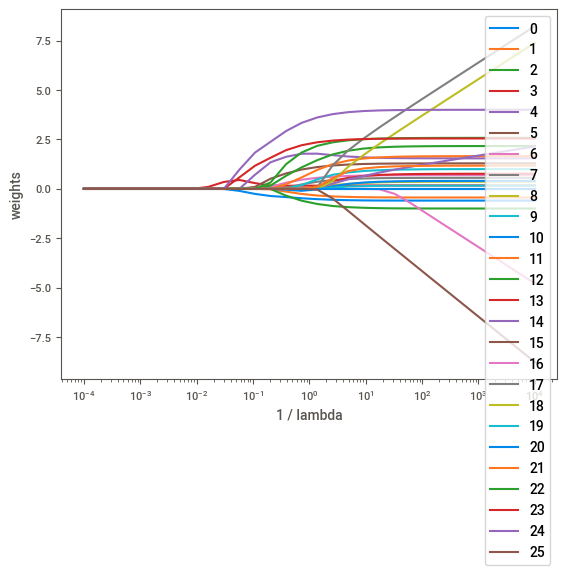

In [31]:
# Plot the Lasso Regression Chart
%matplotlib inline
lasso_plot(model.Cs_, theta, legends=list(range(len(X.columns)))) # input number of variables used as the range

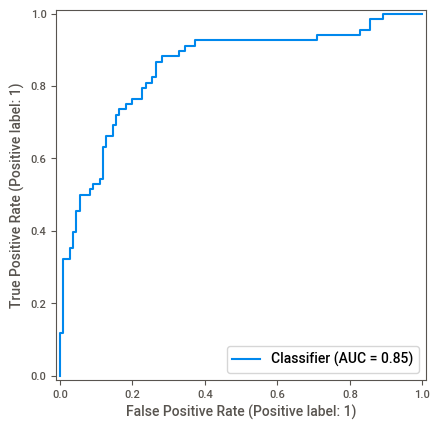

In [32]:
# Plot the ROC Curve
%matplotlib inline
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred_prob)
plt.show()

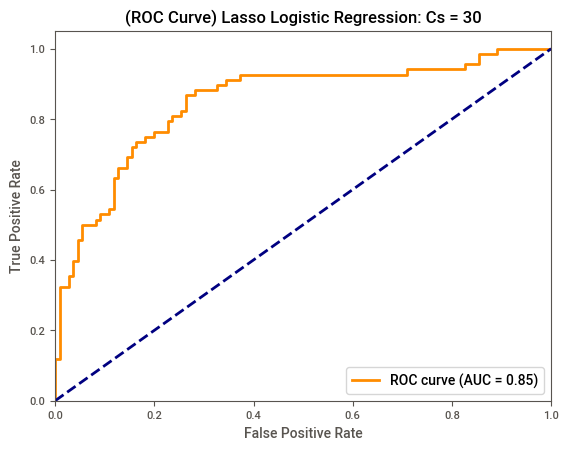

In [33]:
# Plot the ROC a different way
# Assuming you have y_true (true labels) and y_pred (predicted probabilities)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC Curve) Lasso Logistic Regression: Cs = 30')
plt.legend(loc="lower right")
plt.show()

In [34]:
# Create the KS Statistic

# Grab the predicted probability percentages from class 1 (Survived)
y_pred_prob = model.predict_proba(X_test)
y_pred_prob = y_pred_prob[:, 1]

# Convert the predicted probability into a series for mergering
y_pred_ks = pd.Series(y_pred_prob)

# Merge X_train with the probability of class 1 on index
ks_data = X_train.merge(y_pred_ks.rename('prob_class1'), left_index=True, right_index=True)

# Merge the new ks_data with y_train on index
ks_data = ks_data.merge(y_train, left_index=True, right_index=True)

# Sort the probability in ascending order
ks_data = ks_data.sort_values(by=['prob_class1'], ascending=True)

# Create a flag for class 0 from Survived
ks_data['Class0_Flag'] = np.where(ks_data['Survived']==0, 1, 0)

# Create Cummulative Sum Columns for 0 and 1 in Survived. 
# The sum will be based on the order of the probability sorted in an earlier step.
ks_data['Class0_Cum_Sum'] = ks_data['Class0_Flag'].cumsum()
ks_data['Class1_Cum_Sum'] = ks_data['Survived'].cumsum()

# Create Cummulative Perce
ks_data['Class0_Cum_Pct'] = 100*ks_data['Class0_Cum_Sum']/ks_data['Class0_Flag'].sum()
ks_data['Class1_Cum_Pct'] = 100*ks_data['Class1_Cum_Sum']/ks_data['Survived'].sum()

ks_data['KS_Statistic'] = ks_data['Class0_Cum_Pct'] - ks_data['Class1_Cum_Pct']

print("KS Statistic:", ks_data['KS_Statistic'].abs().max())

KS Statistic: 14.721208963001558


In [35]:
# Logistic Regression Predition of the Number of Survivors in the Titanic Test Data Set
y_pred1 = model.predict(X_test)

print("The logistic regression model predicts that", y_pred1.sum(), 'out of', len(y_pred1), "passengers will survive the Titanic disaster")

The logistic regression model predicts that 64 out of 178 passengers will survive the Titanic disaster


## Explanation of Features
#### Varies everytime ran, but concepts should hold true if negatives and postive coefs stay neg/pos
- At each increment of 13 years of age, the probability of surviving decreases by 0.32
- if you are with a sibling or a spouse your survival probability goes down 0.22
- if you are with a parent or have children with you your survival probability goes down 0.6
    - Although I believe further feature extraction by age in this feature would prove survival goes up if you have a parent and down if you are said parent
- for every 50 dollars spent towards your ticket your survival probability increases by 0.17
- if you are in 1st class as opposed to third your survival probability increases by 1.44
- if you are in 2nd class as opposed to third your survival probability increases by 0.82
- if you are a female as opposed to male, your survival probability increases by 2.6
- if you boarded from Cherbourg as opposed to Southampton your survival probability increases by 0.34
- If you stayed on Cabin floor D as opposed to a random room your survival probability increases by 0.45
- If you held the title Master instead of Mr. your survival probability increases by 1.78
- If you held the title Mrs. instead of Mr. your survival probability increases by 0.43

In [36]:
results = []

In [39]:
# Create a Radial Base Function Kernel Support Vector Machine Model
# Run it on a loop to test different C and Gammas
# In previous runs I tried many different combinations of C (a.k.a. X in the code) and Gamma (a.k.a. y in the code).
# I previously ran different combinations from C as small as 0.1 to 200. I also ran Gamma for as low as 0.1
# to 10. The best results for Test Accuracy and F-Score and Train Accuracy and F-Score is C = 2.84 and Gamma = 0.9.
# This is the lowest C and Gamma with the best stats in all 4 test statistics
for x in map(lambda x: x/100.0, range(250, 350, 1)): # a.k.a. range(2.50, 3.50, 0.01):
    for y in map(lambda y: y/100.0, range(50, 210, 10)): # a.k.a. range(0.5, 2.1, 0.1):

        # C = regularization parameter. Smaller C = larger margin = more misclassifications. Larger C = tighter margin = possible overfitting.
        # 'rbf' (Radial Basis Function) maps features into a higher-dimensional space
        # gamma is the setting used to smooth out the edges. Too small = underfit (doesn’t capture complexity). Too large = overfit
        # probability = True enables cross validation
        clf = SVC(C=x, kernel = 'rbf', gamma = y, probability=True)

        # C is the inverse of the regularization strength. Smaller C means stronger regularization. Larger C means weaker regularization.
        # Fit SVM model based on X and Y
        clf.fit(X_train, y_train)

        # Create y and y prediction arrays for accuracy, Precision, Recall, and F-score
        yhat_train = clf.predict_proba(X_train)
        y_pred_train = clf.predict(X_train)

        yhat_test = clf.predict_proba(X_test)
        y_pred_test = clf.predict(X_test)

        acc_score_train = accuracy_score(y_train, y_pred_train)
        acc_score_test = accuracy_score(y_test, y_pred_test)
        
        f_train = f1_score(y_train, y_pred_train)
        f_test = f1_score(y_test, y_pred_test)
        
        # Create a list of C, Gamma, Training Accuracy, Test Accuracy, Training F-Score, and Test F-Score
        row = [x, y, acc_score_train, acc_score_test, f_train, f_test]
        
        # Append the results for further review.
        results.append(row)

# Create a dataframe for the final results
results_final = pd.DataFrame(results)

In [40]:
# Add column titles and change column types
results_final = results_final.set_axis(['C', 'Gamma', 'Train Accuracy', 'Test Accuracy', 'Train F-Score', 'Test F-Score'], axis=1)
results_final = results_final.astype({'C': float, 'Gamma': float, 'Train Accuracy': float, 'Test Accuracy': float, 'Train F-Score': float, 'Test F-Score': float})

# Sort by accuracy with the most accurate at the top
results_final = results_final.sort_values(by=['Test F-Score', 'Test Accuracy', 'Train F-Score', 'Train Accuracy', 'C', 'Gamma'], ascending=False)

print(results_final.to_string())

         C  Gamma  Train Accuracy  Test Accuracy  Train F-Score  Test F-Score
330   2.70    1.5        0.902954       0.820225       0.867052      0.757576
314   2.69    1.5        0.902954       0.820225       0.867052      0.757576
298   2.68    1.5        0.902954       0.820225       0.867052      0.757576
282   2.67    1.5        0.902954       0.820225       0.867052      0.757576
266   2.66    1.5        0.902954       0.820225       0.867052      0.757576
250   2.65    1.5        0.902954       0.820225       0.867052      0.757576
234   2.64    1.5        0.902954       0.820225       0.867052      0.757576
218   2.63    1.5        0.902954       0.820225       0.867052      0.757576
202   2.62    1.5        0.902954       0.820225       0.867052      0.757576
186   2.61    1.5        0.902954       0.820225       0.867052      0.757576
170   2.60    1.5        0.902954       0.820225       0.867052      0.757576
154   2.59    1.5        0.902954       0.820225       0.867052 

In [41]:
# Final Chosen Model
# The best results for Test and Train Accuracy and F-Score is C = 2.83 and Gamma = 0.9.
# This is the lowest C and Gamma with the best score in all 4 test statistics.
clf = SVC(C=2.83, kernel = 'rbf', gamma = 0.9, probability=True)
# Fit SVM model based on X and Y
clf.fit(X_train, y_train)

# Create y and y prediction arrays for accuracy, Precision, Recall, and F-score
yhat_train = clf.predict_proba(X_train)
y_pred_train = clf.predict(X_train)

yhat_test = clf.predict_proba(X_test)
y_pred_test = clf.predict(X_test)

acc_score_train = accuracy_score(y_train, y_pred_train)
acc_score_test = accuracy_score(y_test, y_pred_test)

In [42]:
# Show the model intercept
print("Intercept:", clf.intercept_[0])

Intercept: 0.3000168041443453


In [43]:
# Show the number of model features
clf.n_features_in_

26

In [44]:
# Show the model indices of support vectors.
clf.support_

array([  2,   5,   7,  10,  14,  24,  30,  34,  38,  45,  48,  49,  54,
        59,  61,  66,  69,  77,  86,  90, 100, 101, 102, 104, 108, 112,
       115, 116, 120, 121, 124, 128, 135, 136, 137, 139, 140, 141, 142,
       145, 148, 153, 154, 156, 167, 178, 179, 180, 182, 186, 197, 204,
       207, 209, 210, 220, 224, 225, 227, 228, 232, 241, 244, 250, 251,
       252, 253, 258, 265, 266, 267, 274, 279, 281, 285, 292, 296, 300,
       305, 310, 312, 316, 320, 326, 328, 329, 344, 345, 346, 350, 358,
       359, 360, 369, 371, 375, 377, 384, 387, 389, 392, 393, 394, 396,
       397, 398, 404, 407, 410, 411, 420, 425, 427, 432, 438, 440, 450,
       453, 458, 461, 465, 466, 467, 468, 475, 476, 478, 480, 483, 496,
       497, 498, 501, 505, 510, 511, 516, 518, 520, 527, 532, 533, 539,
       544, 545, 546, 553, 554, 561, 562, 563, 564, 572, 576, 577, 578,
       592, 602, 604, 606, 612, 614, 617, 618, 621, 625, 626, 627, 628,
       631, 636, 638, 640, 641, 642, 643, 644, 646, 647, 655, 66

In [45]:
# Show the Model's dual coefficients of the support vector in the decision function
clf.dual_coef_

array([[-2.83000000e+00, -1.13419419e+00, -2.83000000e+00,
        -9.04262495e-01, -1.43170181e+00, -1.08810677e+00,
        -1.72639838e+00, -7.27737152e-01, -4.26499905e-01,
        -2.83000000e+00, -2.15941603e+00, -1.58524927e+00,
        -5.17077732e-01, -2.53859720e-01, -2.83000000e+00,
        -2.83000000e+00, -1.50741869e+00, -2.83000000e+00,
        -2.83000000e+00, -1.12519260e+00, -2.83000000e+00,
        -5.27884761e-01, -2.83000000e+00, -2.83000000e+00,
        -2.83000000e+00, -1.50240665e+00, -8.60180371e-01,
        -2.83000000e+00, -2.83000000e+00, -2.28192288e+00,
        -1.72796028e+00, -1.32167678e+00, -2.83000000e+00,
        -2.83000000e+00, -1.67713172e+00, -1.43913957e+00,
        -1.29240437e+00, -1.19762692e+00, -6.81611138e-01,
        -2.83000000e+00, -6.36832913e-01, -2.70413137e+00,
        -2.14230643e+00, -2.83000000e+00, -1.59280333e+00,
        -2.83000000e+00, -7.79297239e-01, -8.22447886e-01,
        -1.76225808e+00, -1.33398842e+00, -1.31796242e+0

In [46]:
# Compute ROC curve and ROC area for each class

# class 0
fpr_0, tpr_0, _= roc_curve(y_train, yhat_train[:, 0], pos_label=0)
roc_auc_0 = roc_auc_score (y_train, yhat_train[:, 0])

# class 1
fpr_1, tpr_1, _ = roc_curve(y_train, yhat_train[:, 1], pos_label=1)
roc_auc_1 = roc_auc_score(y_train, yhat_train[:, 1])

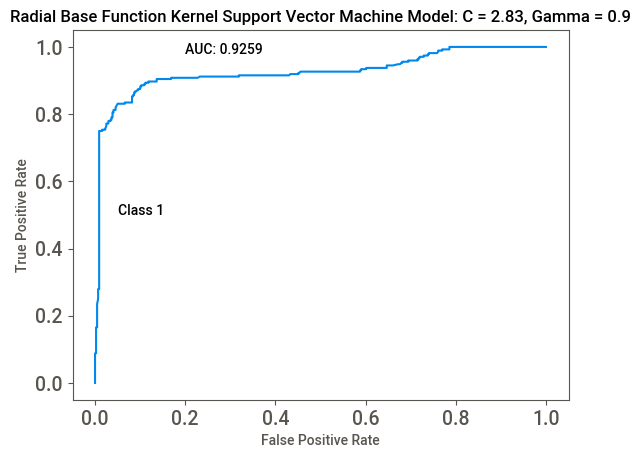

In [47]:
#%matplotlib inline

# ROC Curve for Class 1

#define metrics
y_pred_proba = clf.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Radial Base Function Kernel Support Vector Machine Model: C = 2.83, Gamma = 0.9')
# Add a note
plt.annotate(f'AUC: {roc_auc_1:.4f}', xy = (0.2, 0.98))
plt.annotate('Class 1', xy = (0.05, 0.5))
plt.tick_params(labelsize = 14)

plt.show()

In [48]:
# Area under the ROC curve
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC score: {auc_score:.3f}")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.3f}")

# Recall
recall = recall_score(y_test, y_pred) 
print(f"Recall: {recall:.3f}")

# F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.3f}")

scores = classification_report(y_test,y_pred)
print(scores)
cm = confusion_matrix(y_test, y_pred)
print(cm)

AUC score: 0.850
Accuracy: 0.787
Precision: 0.734
Recall: 0.691
F1-score: 0.712
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.73      0.69      0.71        68

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.78      0.79      0.79       178

[[93 17]
 [21 47]]


In [49]:
# Radial Base Function Kernel Support Vector Machine Model Predition of the Number of Survivors in the Titanic Test Data Set
y_pred2 = clf.predict(X_test)

print("The SVM RBF model predicts that", y_pred2.sum(), 'out of', len(y_pred2), "passengers will survive the Titanic disaster")

The SVM RBF model predicts that 56 out of 178 passengers will survive the Titanic disaster


# Decision Trees (Basic and Pruned) and Random Forest Model Evaluation

Max tree depth is : 24 Levels


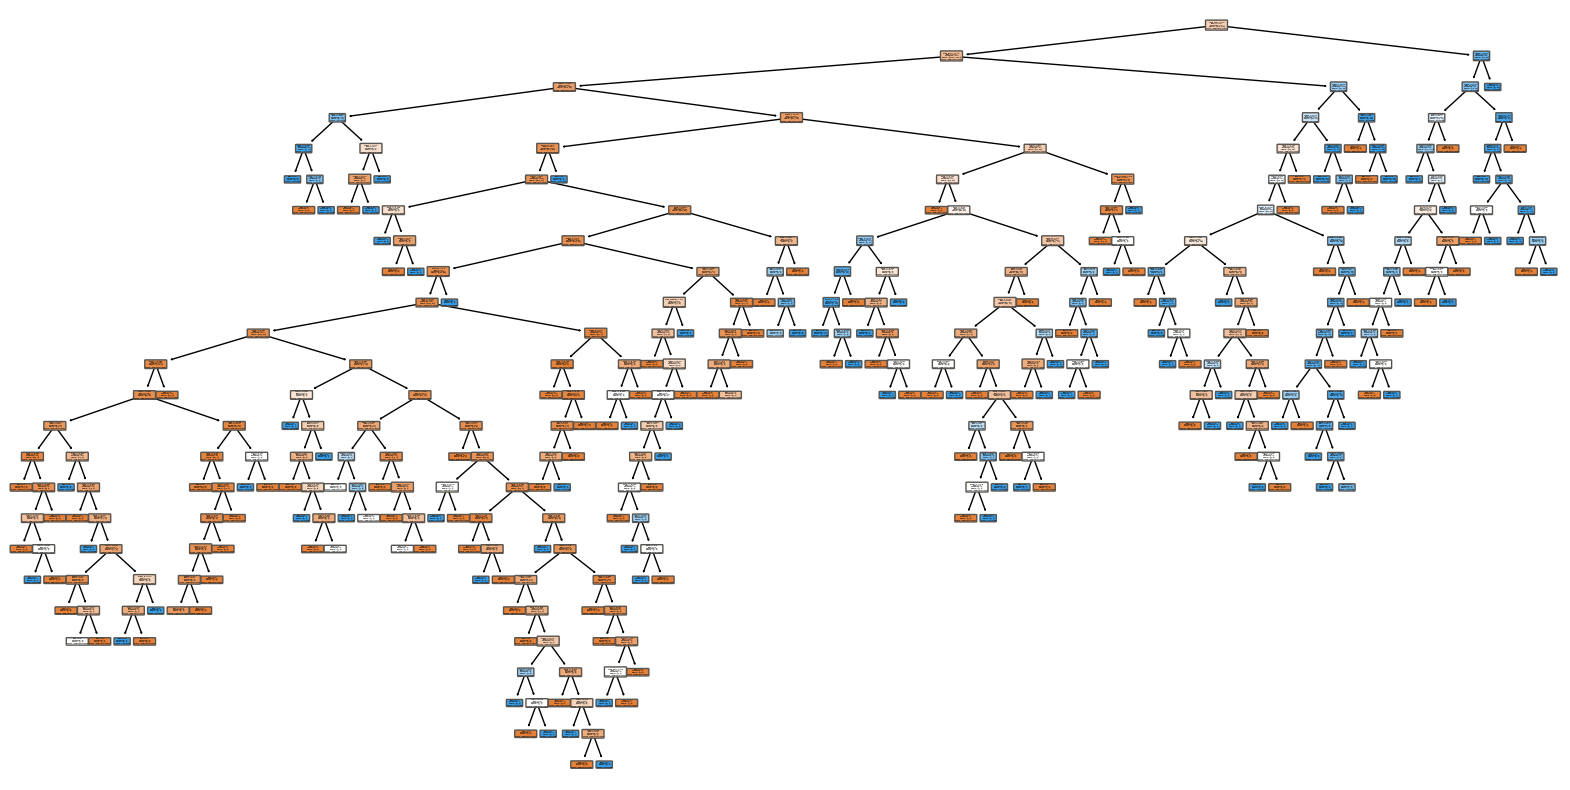

In [50]:
# 1a. Basic Decision Tree: Prone to overfitting, but provides a baseline performance 
# and helps in understanding the importance of tree depth.
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
print("Max tree depth is : "+ str(dt_clf.tree_.max_depth) + " Levels")
plt.figure(figsize=(20,10))
plot_tree(dt_clf, feature_names=list(X.columns), class_names=['Did not survive', 'Survived'], filled=True, rounded=True)
plt.savefig('basic_decision_tree.png', dpi=300, bbox_inches='tight')
#plt.close()
plt.show()

In [51]:
# 1b. DT precision recall  f1-score

dt_pred = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

print(" Basic Decision Tree")
print(f"Accuracy: {dt_accuracy:.4f}")
print(classification_report(y_test, dt_pred))

 Basic Decision Tree
Accuracy: 0.7472
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       110
           1       0.69      0.62      0.65        68

    accuracy                           0.75       178
   macro avg       0.73      0.72      0.73       178
weighted avg       0.74      0.75      0.74       178



In [53]:
"""Overall Accuracy:

The basic model has an accuracy of 0.7640, meaning it correctly predicts the outcome for about 76.40% of the cases in the test set.


Class-wise Performance:

Class 0 ( "did not survive"):

Precision: 79% of predictions of "did not survive" were correct
Recall: 84% of actual "did not survive" cases were correctly identified
F1-score: 0.82 (mean of precision and recall)


Class 1 ("survived"):

Precision: 70% of predictions of "survived" were correct)
Recall: 64% of actual "survived" cases were correctly identified)
F1-score: 0.67 (mean of precision and recall)

The basic DT model performs better at predicting "did not survive" (class 0) than "survived" (class 1).
The test set has a slight class imbalance (more instances of "did not survive").
The model has OK overall performance, but it can be improved"""

'Overall Accuracy:\n\nThe basic model has an accuracy of 0.7640, meaning it correctly predicts the outcome for about 76.40% of the cases in the test set.\n\n\nClass-wise Performance:\n\nClass 0 ( "did not survive"):\n\nPrecision: 79% of predictions of "did not survive" were correct\nRecall: 84% of actual "did not survive" cases were correctly identified\nF1-score: 0.82 (mean of precision and recall)\n\n\nClass 1 ("survived"):\n\nPrecision: 70% of predictions of "survived" were correct)\nRecall: 64% of actual "survived" cases were correctly identified)\nF1-score: 0.67 (mean of precision and recall)\n\nThe basic DT model performs better at predicting "did not survive" (class 0) than "survived" (class 1).\nThe test set has a slight class imbalance (more instances of "did not survive").\nThe model has OK overall performance, but it can be improved'

In [52]:
# Eval using cross-validation
dt_cv_scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
print(f"Decision Tree Cross-Validation Scores: {dt_cv_scores}")
print(f"Decision Tree Mean CV Score: {dt_cv_scores.mean():.4f} (+/- {np.std(dt_cv_scores) * 2:.4f})")

Decision Tree Cross-Validation Scores: [0.74825175 0.73239437 0.79577465 0.78873239 0.76056338]
Decision Tree Mean CV Score: 0.7651 (+/- 0.0479)


In [53]:
"""The basic model's performance is fairly consistent across most folds, with the folds accuracies ranging from about 77% to 80%.
However, the last/fifth fold (0.71126761) shows a larger drop in performance, this could indicate that the model's performance can be overly sensitive to that specific subset of data it's trained and tested on.
The mean CV score of 0.7665shows the basic DT model correctly predicts about 76.65% of the cases."""

"The basic model's performance is fairly consistent across most folds, with the folds accuracies ranging from about 77% to 80%.\nHowever, the last/fifth fold (0.71126761) shows a larger drop in performance, this could indicate that the model's performance can be overly sensitive to that specific subset of data it's trained and tested on.\nThe mean CV score of 0.7665shows the basic DT model correctly predicts about 76.65% of the cases."

In [54]:
"""For the Titanic survival prediction task, We find that a decision tree with a depth of around 5-7 
to get the best balance between model complexity and predictive accuracy."""

'For the Titanic survival prediction task, We find that a decision tree with a depth of around 5-7 \nto get the best balance between model complexity and predictive accuracy.'

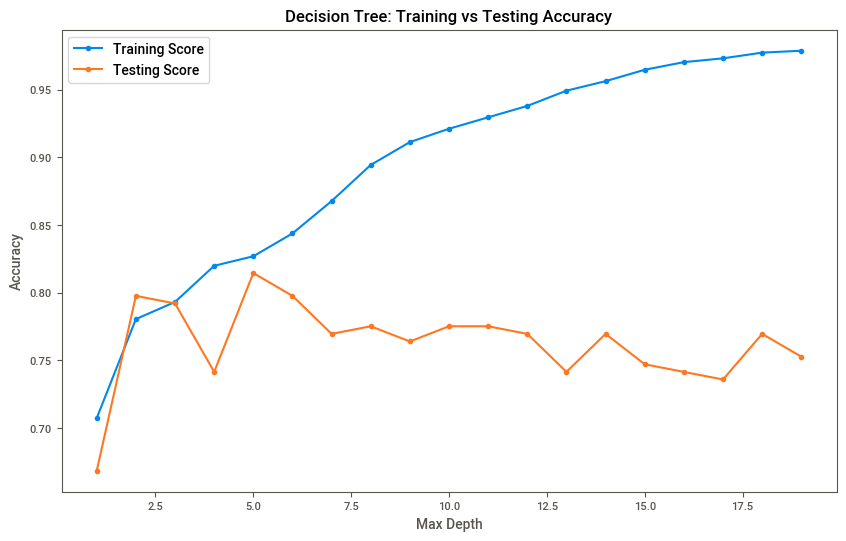

In [55]:
#Overffiting

max_depths = range(1, 20)
train_scores = []
test_scores = []

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_clf.fit(X_train, y_train)
    train_scores.append(dt_clf.score(X_train, y_train))
    test_scores.append(dt_clf.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, 'o-', label='Training Score')
plt.plot(max_depths, test_scores, 'o-', label='Testing Score')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Training vs Testing Accuracy')
plt.legend()
plt.show()

In [56]:
""" As the tree depth increases, the training accuracy (blue line) continues to improve, eventually reaching nearly 100%. 
However, the testing accuracy (orange line) peaks early and then starts to decline which is a sign of overfitting.

 The testing accuracy reaches its highest point around a depth of 5-6. thus For the Titanic survival prediction task, We find that a decision tree with a depth of around 5-6 
to get the best balance between model complexity and predictive accuracy
"""

' As the tree depth increases, the training accuracy (blue line) continues to improve, eventually reaching nearly 100%. \nHowever, the testing accuracy (orange line) peaks early and then starts to decline which is a sign of overfitting.\n\n The testing accuracy reaches its highest point around a depth of 5-6. thus For the Titanic survival prediction task, We find that a decision tree with a depth of around 5-6 \nto get the best balance between model complexity and predictive accuracy\n'

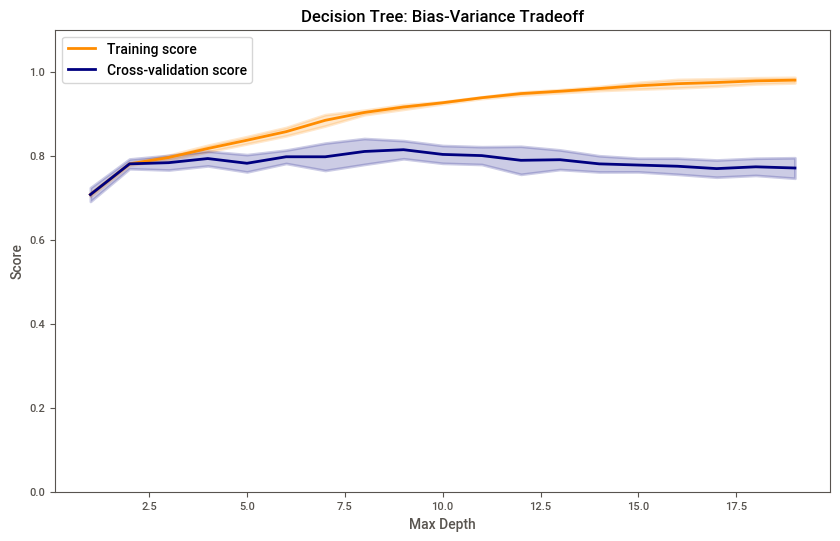

In [57]:
#Bias-Variance Tradeoff

from sklearn.model_selection import validation_curve

param_range = range(1, 20)
train_scores, test_scores = validation_curve(
    dt_clf, X_train, y_train,
    param_name="max_depth", param_range=param_range, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Decision Tree: Bias-Variance Tradeoff")
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_mean, label="Training score", color="darkorange", lw=lw)
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="darkorange", lw=lw)
plt.plot(param_range, test_mean, label="Cross-validation score", color="navy", lw=lw)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [58]:
"""This bias-variance tradeoff plot offers a more nuanced and statistically robust view of decision tree performance 
compared to the previous training vs testing accuracy plot. While both illustrate the phenomenon of overfitting as 
tree depth increases, this plot employs cross-validation instead of a single test set, providing a more reliable 
estimate of model generalization. The shaded area around the cross-validation line represents score variability 
across folds, a feature absent in the previous plot. 
Interestingly, this plot suggests an optimal tree depth of 2-3, whereas the earlier plot (Training vs Testing Accuracy) 
indicated 5-6. Diff results due to diff evaluation methods can lead to varying conclusions. """

'This bias-variance tradeoff plot offers a more nuanced and statistically robust view of decision tree performance \ncompared to the previous training vs testing accuracy plot. While both illustrate the phenomenon of overfitting as \ntree depth increases, this plot employs cross-validation instead of a single test set, providing a more reliable \nestimate of model generalization. The shaded area around the cross-validation line represents score variability \nacross folds, a feature absent in the previous plot. \nInterestingly, this plot suggests an optimal tree depth of 2-3, whereas the earlier plot (Training vs Testing Accuracy) \nindicated 5-6. Diff results due to diff evaluation methods can lead to varying conclusions. '

In [59]:
# 2. Pruned Decision Tree
# Find optimal alpha
path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

best_alpha = ccp_alphas[np.argmax(test_scores)]
dt_pruned = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=42)
dt_pruned.fit(X_train, y_train)

pruned_scores = cross_val_score(dt_pruned, X_train, y_train, cv=5)
print(f"Pruned Decision Tree Mean CV Score: {pruned_scores.mean():.4f}")

dt_pred = dt_pruned.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

dt_pred
dt_accuracy

print(" Pruned Decision Tree")
print(f"Accuracy: {dt_accuracy:.4f}")
print(classification_report(y_test, dt_pred))

Pruned Decision Tree Mean CV Score: 0.7932
 Pruned Decision Tree
Accuracy: 0.8258
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.74      0.76        68

    accuracy                           0.83       178
   macro avg       0.82      0.81      0.81       178
weighted avg       0.82      0.83      0.82       178



In [60]:
"""The pruned model correctly predicts about 78.91% of cases across different subsets of the data.
pruned model correctly predicts 82.58% of cases in this test set,Also the pruned model is better at identifying non-survivors 
(higher recall for class 0 at 92% ) but is more precise when predicting survivors."""

'The pruned model correctly predicts about 78.91% of cases across different subsets of the data.\npruned model correctly predicts 82.58% of cases in this test set,Also the pruned model is better at identifying non-survivors \n(higher recall for class 0 at 92% ) but is more precise when predicting survivors.'

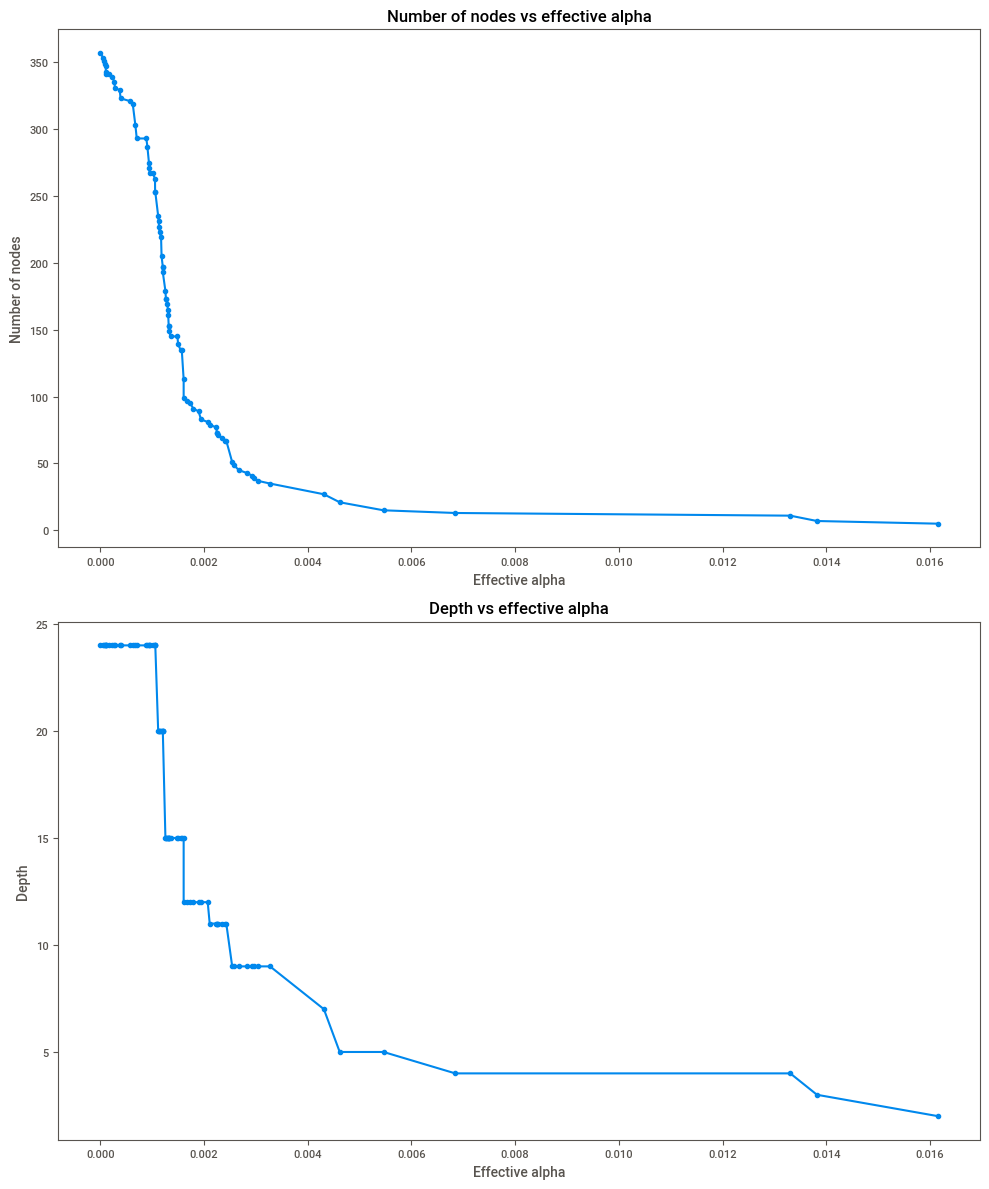

In [61]:
# Pruned Decision Tree - Tree Size vs Alpha

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1, figsize=(10, 12))
ax[0].plot(ccp_alphas[:-1], node_counts[:-1], marker='o')
ax[0].set_xlabel("Effective alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs effective alpha")

ax[1].plot(ccp_alphas[:-1], depth[:-1], marker='o')
ax[1].set_xlabel("Effective alpha")
ax[1].set_ylabel("Depth")
ax[1].set_title("Depth vs effective alpha")

plt.tight_layout()
plt.show()

In [62]:
""" As alpha increases, both the number of nodes and the depth of the tree decrease, simplifying the model.
it looks like trying to set alpha to a value between .002 and .006 would reduce overfitting while maintaining 
the model's predictive power"""

" As alpha increases, both the number of nodes and the depth of the tree decrease, simplifying the model.\nit looks like trying to set alpha to a value between .002 and .006 would reduce overfitting while maintaining \nthe model's predictive power"

Max tree depth is : 5 Levels


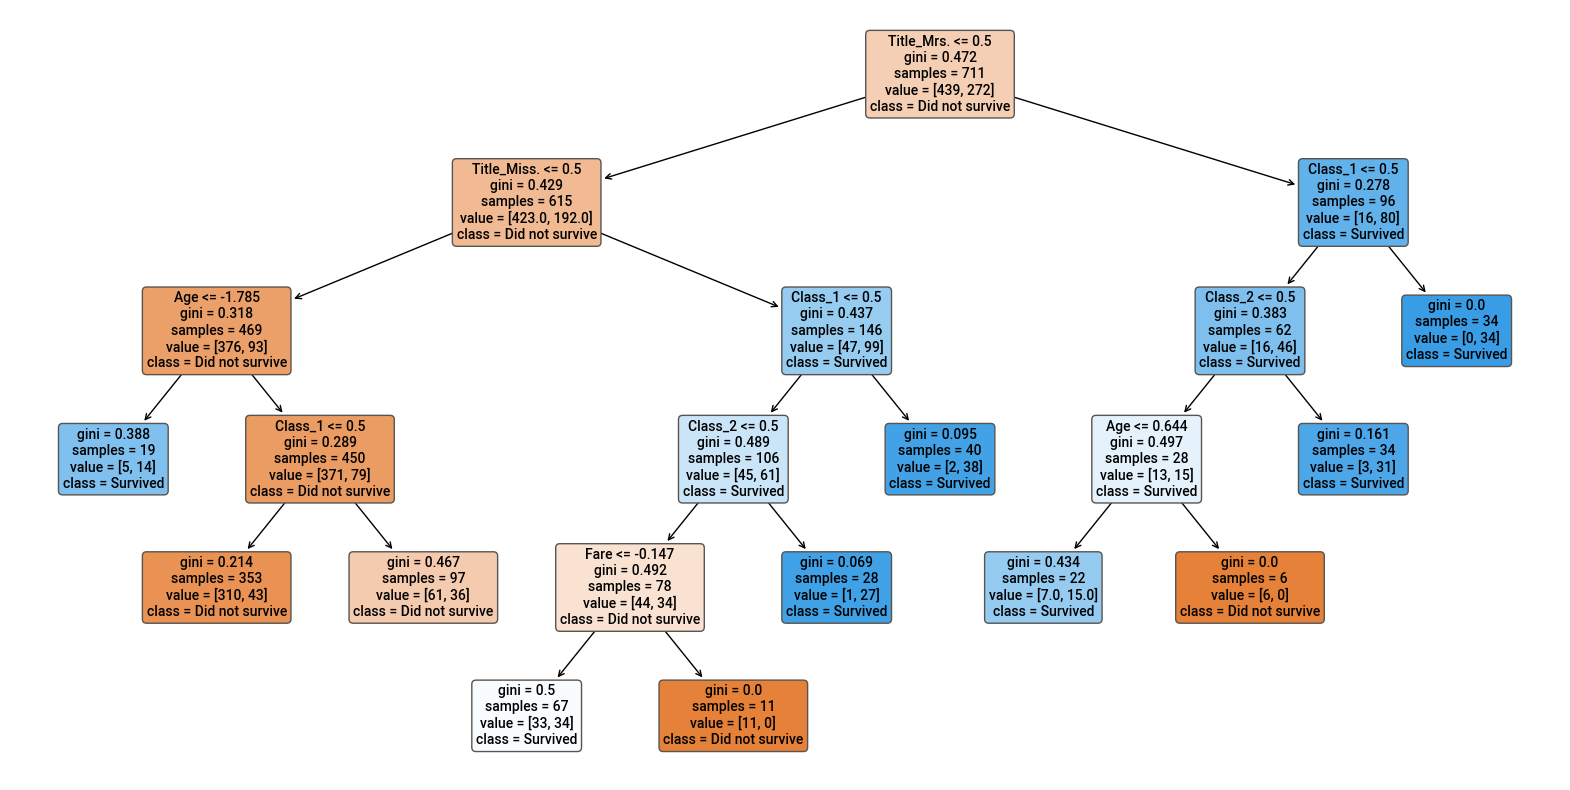

In [63]:
# 2a. Show the pruned tree
print("Max tree depth is : "+ str(dt_pruned.tree_.max_depth) + " Levels")
plt.figure(figsize=(20,10))
plot_tree(dt_pruned, 
          feature_names=list(X_train.columns),
          class_names=['Did not survive', 'Survived'],
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.savefig('titanic_pruned_decision_tree.png', dpi=300, bbox_inches='tight')
plt.show()

In [64]:
# 3a. Random Forest
# Creates a Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# n_estimators: Number of trees in the forest. max_depth: Maximum depth of each tree. None means nodes are expanded until all leaves are pure.
# min_samples_split: Minimum number of samples required to split an internal node. 
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Cross fold validation = 5
# Scoring = accuracy for evaluation metric
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f"Best Random Forest CV Score: {grid_search.best_score_:.4f}")
print(f"Best Parameters: {grid_search.best_params_}")

Best Random Forest CV Score: 0.8201
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [65]:
"""The best Random Forest model uses 200 trees, each up to 10 levels deep, and it's right about 80% of the time 
when predicting Titanic survivors. The random forest model performs better than basic and pruned we looked at earlier.
"""

"The best Random Forest model uses 200 trees, each up to 10 levels deep, and it's right about 80% of the time \nwhen predicting Titanic survivors. The random forest model performs better than basic and pruned we looked at earlier.\n"

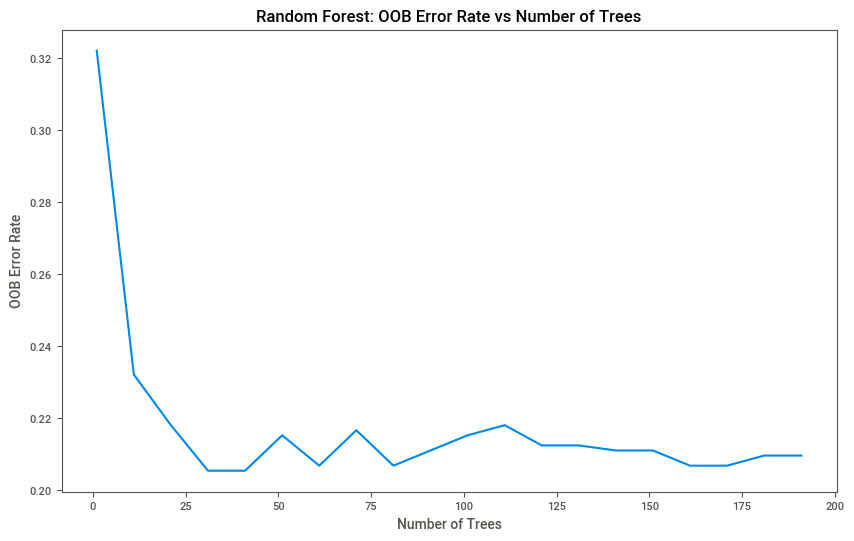

In [66]:
# 3b. Random Forest -  Out-of-Bag (OOB) error rate
# The OOB (Out-of-Bag) error rate in a Random Forest is an internal estimate of the model’s prediction error
n_estimators = range(1, 200, 10)
oob_errors = []

for n in n_estimators:
    rf_clf = RandomForestClassifier(n_estimators=n, oob_score=True, random_state=42)
    rf_clf.fit(X_train, y_train)
    oob_errors.append(1 - rf_clf.oob_score_)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators, oob_errors)
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error Rate')
plt.title('Random Forest: OOB Error Rate vs Number of Trees')
plt.show()

In [67]:
"""Using very few trees (less than 25) results in high error rates.The optimal number of trees is likely around 50-75, as 
additional trees beyond this point offer minimal improvement in performance"""

'Using very few trees (less than 25) results in high error rates.The optimal number of trees is likely around 50-75, as \nadditional trees beyond this point offer minimal improvement in performance'

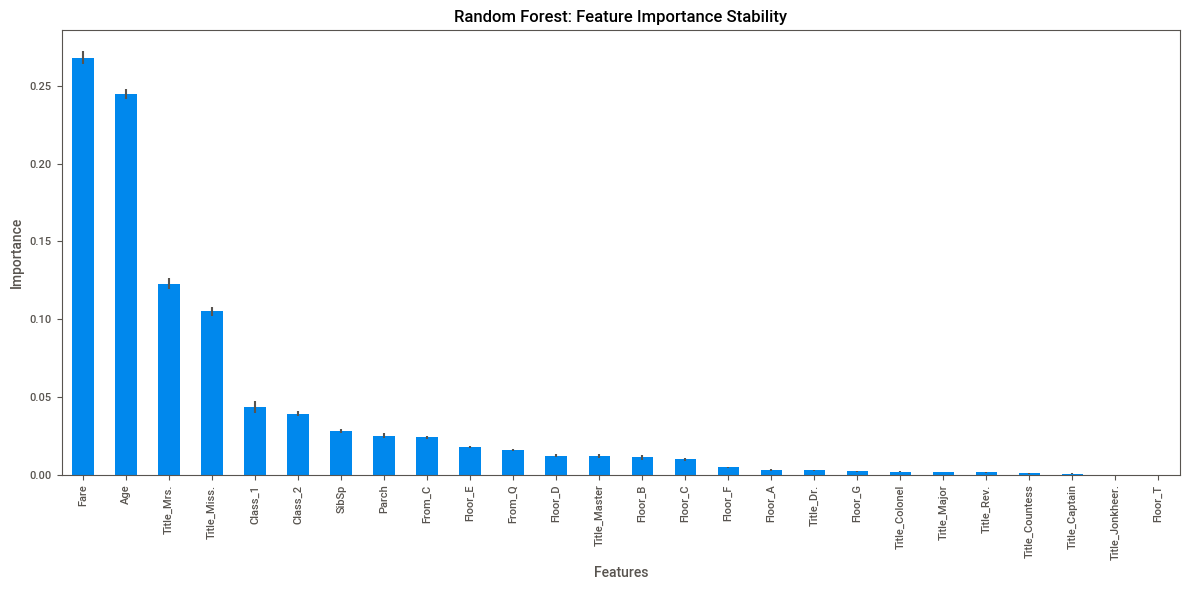

In [68]:
# 3c. Feature Importance (Random Forest)

#import pandas as pd
n_runs = 10
feature_importances = []

for i in range(n_runs):
    rf_clf = RandomForestClassifier(random_state=i)
    rf_clf.fit(X_train, y_train)
    feature_importances.append(rf_clf.feature_importances_)

fi_df = pd.DataFrame(feature_importances, columns=X_train.columns)

plt.figure(figsize=(12, 6))
fi_df.mean().sort_values(ascending=False).plot(kind='bar', yerr=fi_df.std())
plt.title('Random Forest: Feature Importance Stability')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [70]:
feature_importance = {}
for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        feature_importance[name] = model.feature_importances_

df_importance = pd.DataFrame(feature_importance, index=X_train.columns)

plt.figure(figsize=(12, 8))
sns.heatmap(df_importance, annot=True, cmap='YlGnBu')
plt.title('Feature Importance Comparison')
plt.tight_layout()
plt.show()

NameError: name 'models' is not defined

In [71]:
"""
Basic Decision Tree: Fare (0.27) and Age (0.22) are the most important, followed by Title_Mrs. (0.17) and Title_Miss. (0.12).
Pruned Decision Tree: Title_Mrs. (0.31) is the most important, followed by Title_Miss. (0.22), Age (0.16), and Class_1 (0.13).
Random Forest: Age (0.24), Fare (0.26), and Title_Miss. (0.13) are the top features.

For all models, Age, Fare, Title_Mrs., and Title_Miss. are among the top important features.

"""

'\nBasic Decision Tree: Fare (0.27) and Age (0.22) are the most important, followed by Title_Mrs. (0.17) and Title_Miss. (0.12).\nPruned Decision Tree: Title_Mrs. (0.31) is the most important, followed by Title_Miss. (0.22), Age (0.16), and Class_1 (0.13).\nRandom Forest: Age (0.24), Fare (0.26), and Title_Miss. (0.13) are the top features.\n\nFor all models, Age, Fare, Title_Mrs., and Title_Miss. are among the top important features.\n\n'

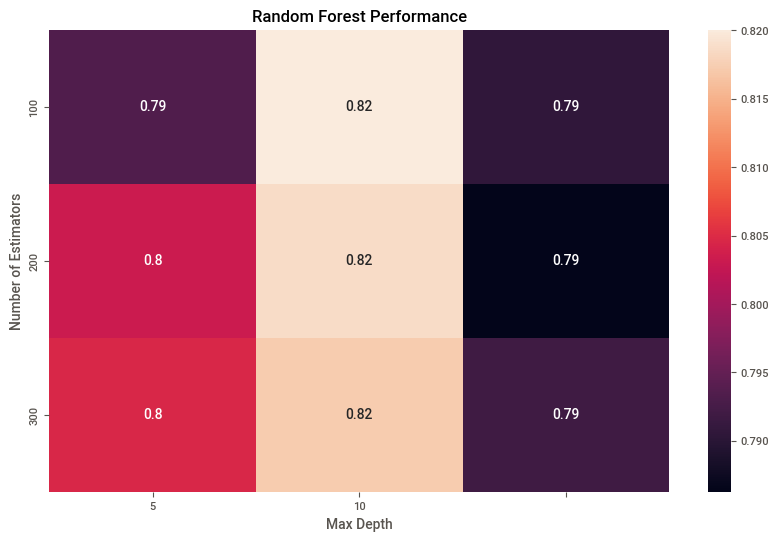

In [72]:
# Random Forest Hyperparameter Tuning
import seaborn as sns
n_estimators = [100, 200, 300]
max_depths = [5, 10, None]

results = np.zeros((len(n_estimators), len(max_depths)))

for i, n in enumerate(n_estimators):
    for j, depth in enumerate(max_depths):
        rf = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=42)
        scores = cross_val_score(rf, X_train, y_train, cv=5)
        results[i, j] = scores.mean()

plt.figure(figsize=(10, 6))
sns.heatmap(results, annot=True, xticklabels=max_depths, yticklabels=n_estimators)
plt.xlabel('Max Depth')
plt.ylabel('Number of Estimators')
plt.title('Random Forest Performance')
plt.show()

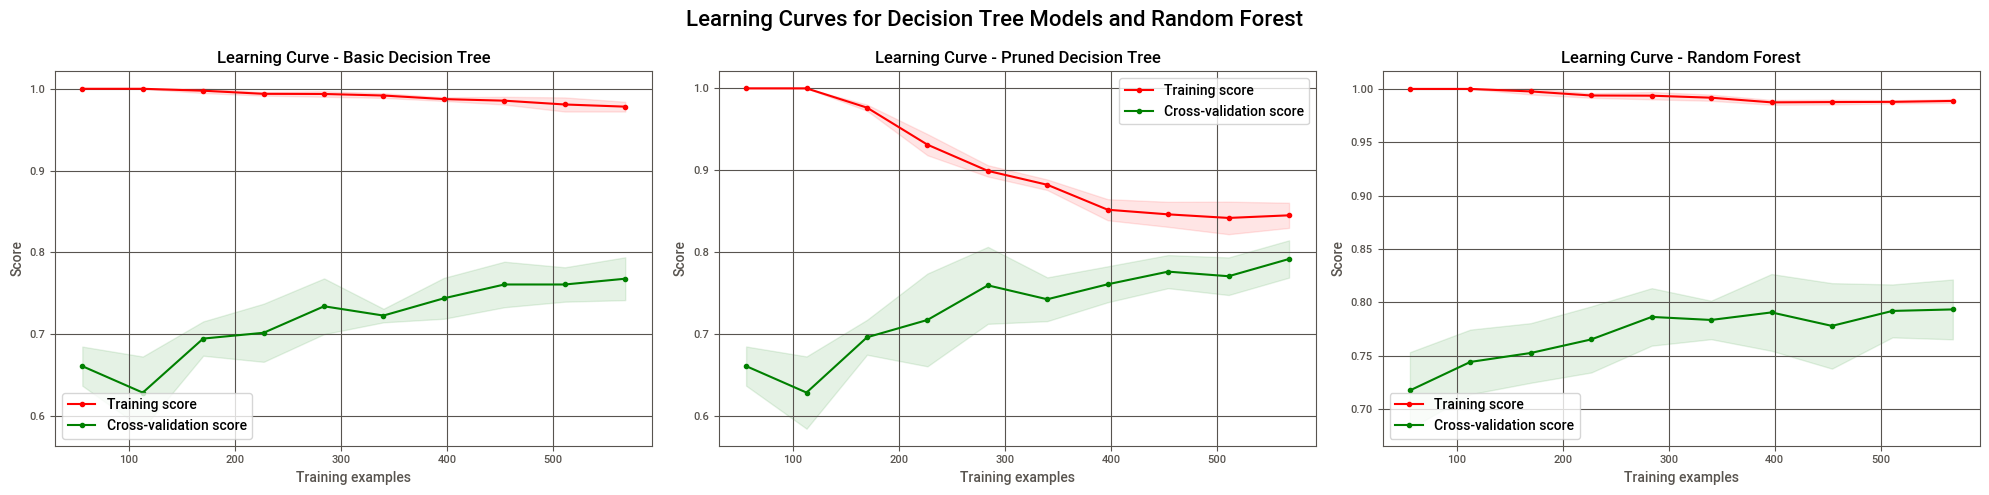

In [73]:
# Learning Curves for All Models -  displays how the training score and cross-validation score
# change as the number of training examples increases
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curves(models):
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    fig.suptitle("Learning Curves for Decision Tree Models and Random Forest", fontsize=16)

    for ax, (name, model) in zip(axes, models.items()):
        train_sizes, train_scores, test_scores = learning_curve(
            model, X_train, y_train, cv=5, n_jobs=-1, 
            train_sizes=np.linspace(0.1, 1.0, 10))
        
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)
        
        ax.set_title(f"Learning Curve - {name}")
        ax.set_xlabel("Training examples")
        ax.set_ylabel("Score")
        ax.grid()
        ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
        ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
        ax.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
        ax.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
        ax.legend(loc="best")

    plt.tight_layout()
    plt.show()

# Plot learning curves for each model
models = {
    'Basic Decision Tree': dt_clf,
    'Pruned Decision Tree': dt_pruned,
    'Random Forest': rf_clf
}

plot_learning_curves(models)

In [74]:
"""
SUMMARY:
Basic Decision Tree:
Training score (red) remains consistently high (near 1.0) regardless of sample size.
Cross-validation score (green) starts low and gradually improves with more data.
Large gap between training and cross-validation scores indicates overfitting.

Pruned Decision Tree:
Training score starts high but decreases as sample size increases.
Cross-validation score improves with more data.
Gap between training and cross-validation scores narrows, showing reduced overfitting compared to the basic tree.

Random Forest:
Training score remains high but slightly lower than the basic tree.
Cross-validation score starts higher than both decision trees and improves steadily.
Smaller gap between training and cross-validation scores indicates better generalization.



overall:

The basic decision tree shows clear signs of overfitting, but pruning helps reduce overfitting in the decision tree model.
Random Forest is showing that the best balance between fitting the training data and generalizing to new data.
All models show some improvement in cross-validation scores with more training examples, 
however Random Forest starts higher and maintains the best performance.
"""

'\nSUMMARY:\nBasic Decision Tree:\nTraining score (red) remains consistently high (near 1.0) regardless of sample size.\nCross-validation score (green) starts low and gradually improves with more data.\nLarge gap between training and cross-validation scores indicates overfitting.\n\nPruned Decision Tree:\nTraining score starts high but decreases as sample size increases.\nCross-validation score improves with more data.\nGap between training and cross-validation scores narrows, showing reduced overfitting compared to the basic tree.\n\nRandom Forest:\nTraining score remains high but slightly lower than the basic tree.\nCross-validation score starts higher than both decision trees and improves steadily.\nSmaller gap between training and cross-validation scores indicates better generalization.\n\n\n\noverall:\n\nThe basic decision tree shows clear signs of overfitting, but pruning helps reduce overfitting in the decision tree model.\nRandom Forest is showing that the best balance between 

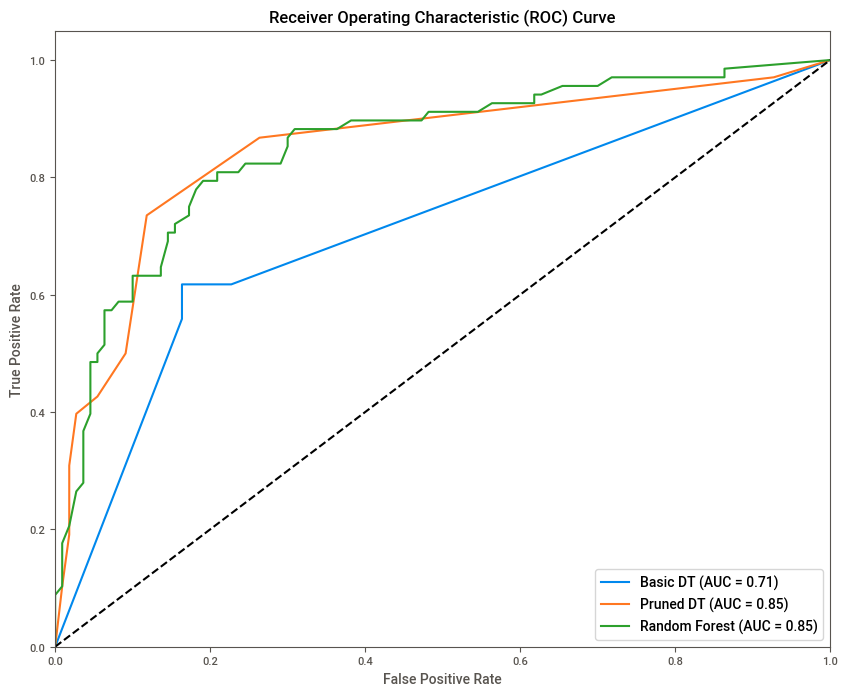

In [75]:
#ROC Curve
plt.figure(figsize=(10, 8))
for model, name in zip([dt_clf, dt_pruned, rf_clf], ['Basic DT', 'Pruned DT', 'Random Forest']):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [76]:
"""
Random Forest (green line) performs best, with an Area Under the Curve (AUC) of 0.86
Pruned Decision Tree (orange line) is second best, with an AUC of 0.81
Basic Decision Tree (blue line) performs worst, with an AUC of 0.73

Random Forest has the highest curve, indicating better overall performance
Pruned DT shows improvement over the Basic DT, suggesting that pruning helped reduce overfitting

"""

'\nRandom Forest (green line) performs best, with an Area Under the Curve (AUC) of 0.86\nPruned Decision Tree (orange line) is second best, with an AUC of 0.81\nBasic Decision Tree (blue line) performs worst, with an AUC of 0.73\n\nRandom Forest has the highest curve, indicating better overall performance\nPruned DT shows improvement over the Basic DT, suggesting that pruning helped reduce overfitting\n\n'

                      Accuracy  Precision    Recall  F1-score
Basic Decision Tree   0.752809   0.700000  0.617647  0.656250
Pruned Decision Tree  0.825843   0.793651  0.735294  0.763359
Random Forest         0.780899   0.784314  0.588235  0.672269


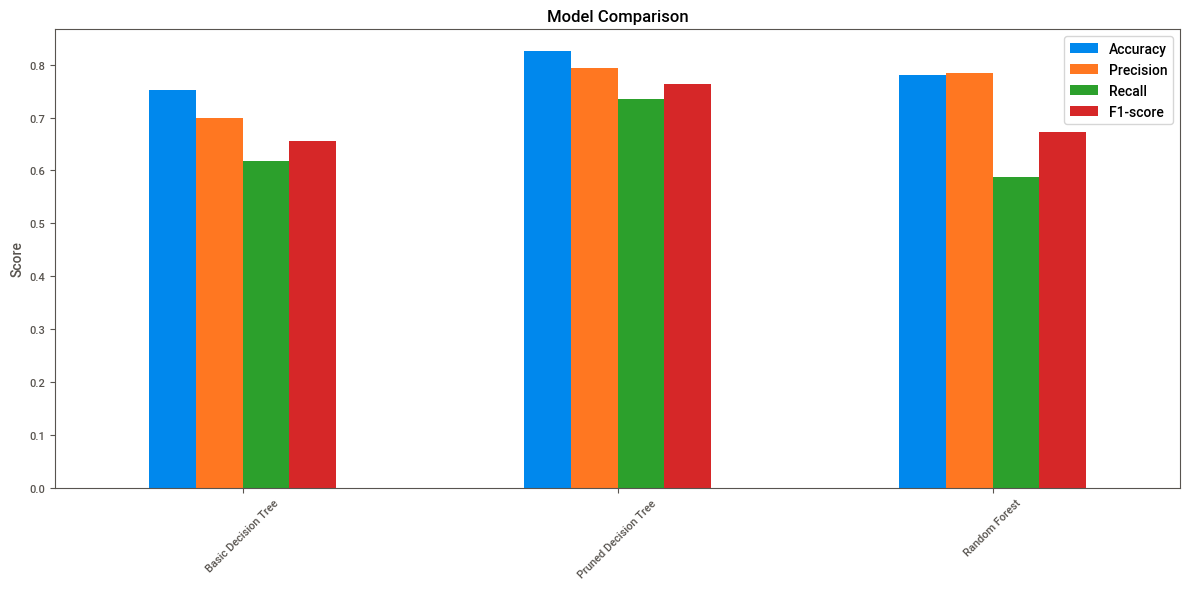

In [77]:
#Pruned Tree Comparison
models = {
    'Basic Decision Tree': dt_clf,
    'Pruned Decision Tree': dt_pruned,
    'Random Forest': rf_clf
}

results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred)
    }

df_results = pd.DataFrame(results).T
print(df_results)

# Plotting
df_results.plot(kind='bar', figsize=(12, 6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

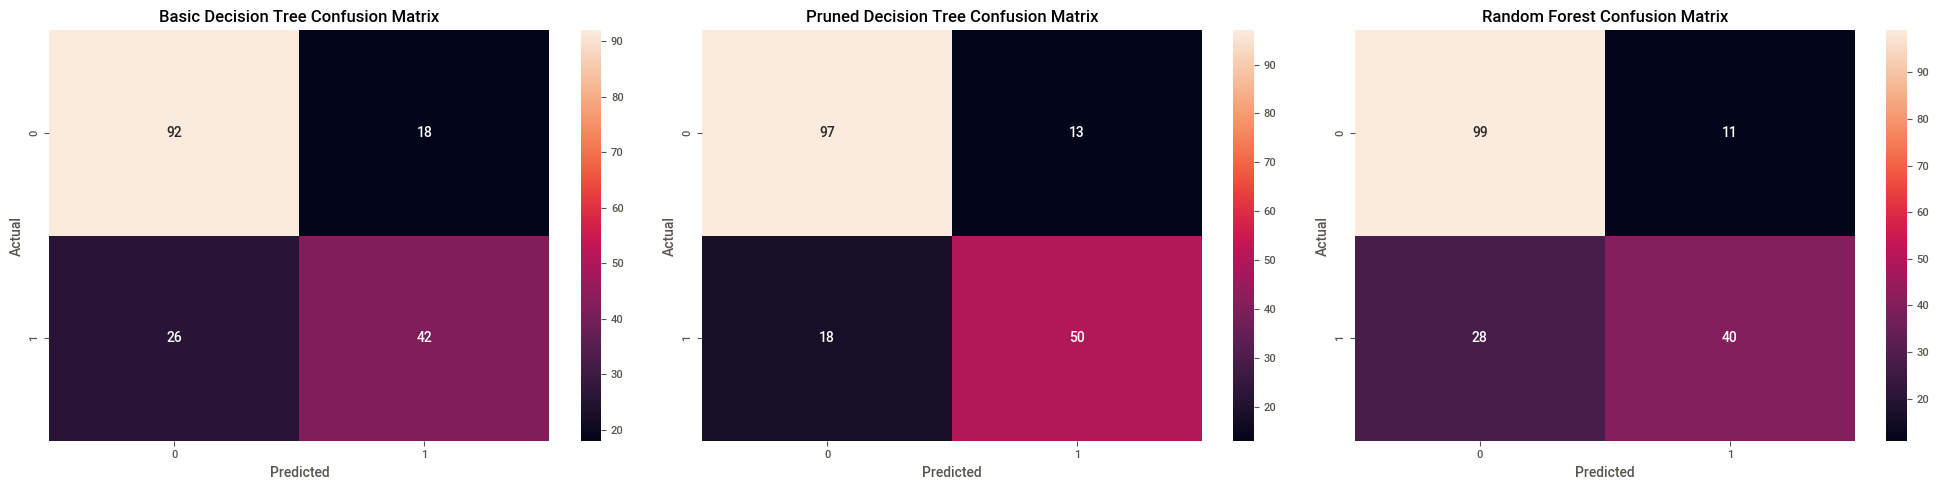

In [78]:
# Confusion Matrices - types of errors each model is making
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax)
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()

In [79]:
"""SUMMARY: This set of matrices show that the pruned decision tree improved on the basic tree by reducing false positives (from 19 to 9) 
and increasing true negatives (from 92 to 102).

The random forest model creates a balance between the basic and pruned trees:

It reduced false negatives compared to both (21 vs 24)
It increased true positives slightly (46 vs 43)
Its false positives (14) fall between the basic (19) and pruned (9) trees

All models seem to perform better at predicting negatives (class 0) than positives (class 1).
The random forest appears to have the best overall performance, with a good balance between reducing false positives and false negatives."""

'SUMMARY: This set of matrices show that the pruned decision tree improved on the basic tree by reducing false positives (from 19 to 9) \nand increasing true negatives (from 92 to 102).\n\nThe random forest model creates a balance between the basic and pruned trees:\n\nIt reduced false negatives compared to both (21 vs 24)\nIt increased true positives slightly (46 vs 43)\nIts false positives (14) fall between the basic (19) and pruned (9) trees\n\nAll models seem to perform better at predicting negatives (class 0) than positives (class 1).\nThe random forest appears to have the best overall performance, with a good balance between reducing false positives and false negatives.'

# Model Comparison

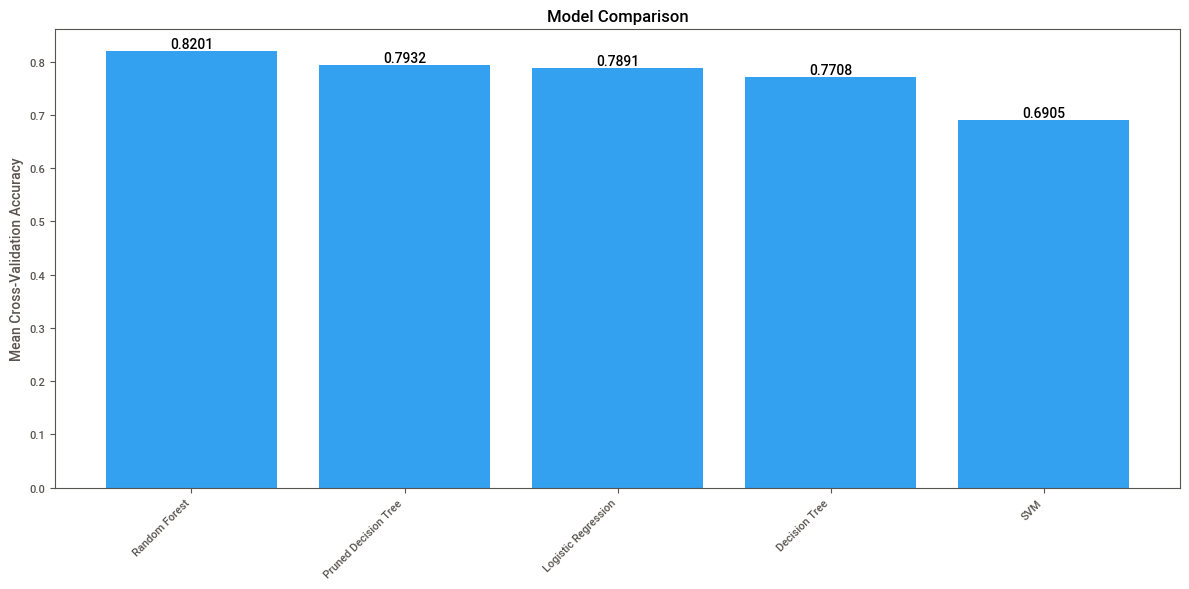

Model Performance Ranking:
1. Random Forest: 0.8201
2. Pruned Decision Tree: 0.7932
3. Logistic Regression: 0.7891
4. Decision Tree: 0.7708
5. SVM: 0.6905

Best performing model: Random Forest with mean CV accuracy of 0.8201


In [80]:
# Compare all models
models = {
    'Logistic Regression': model,  # The logistic regression model
    'SVM': clf,  # The SVM model
    'Decision Tree': dt_clf,  # The original decision tree
    'Pruned Decision Tree': dt_pruned,  # The pruned decision tree
    'Random Forest': grid_search.best_estimator_  # The best random forest model from grid search
}

# Compute cross-validation scores for each model
cv_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores[name] = scores.mean()

# Sort the models by their mean CV score
sorted_scores = sorted(cv_scores.items(), key=lambda x: x[1], reverse=True)

# Plotting
plt.figure(figsize=(12, 6))
models, scores = zip(*sorted_scores)
y_pos = np.arange(len(models))

plt.bar(y_pos, scores, align='center', alpha=0.8)
plt.xticks(y_pos, models, rotation=45, ha='right')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Model Comparison')

# Add value labels on the bars
for i, v in enumerate(scores):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('final_model_comparison.png')
plt.show()

# Print out the scores
print("Model Performance Ranking:")
for i, (model, score) in enumerate(sorted_scores, 1):
    print(f"{i}. {model}: {score:.4f}")

# Identify the best model
best_model = sorted_scores[0][0]
best_score = sorted_scores[0][1]
print(f"\nBest performing model: {best_model} with mean CV accuracy of {best_score:.4f}")

In [81]:
Test_X['Title_Captain'] = 0
Test_X['Title_Countess'] = 0
Test_X['Title_Jonkheer.'] = 0
Test_X['Title_Major'] = 0

Test_X = Test_X[['Age', 'SibSp', 'Parch', 'Fare', 'Class_1', 'Class_2', 'From_C', 'From_Q', 'Floor_A', 'Floor_B', 'Floor_C', 'Floor_D', 'Floor_E', 'Floor_F', 'Floor_G', 'Floor_T', 'Title_Captain', 'Title_Colonel', 'Title_Countess', 'Title_Dr.', 'Title_Jonkheer.', 'Title_Major', 'Title_Master', 'Title_Miss.', 'Title_Mrs.', 'Title_Rev.']]

print(X_train)

              Age  SibSp  Parch      Fare  Class_1  Class_2  From_C  From_Q  \
436 -6.663990e-01      1      1  0.045844        0        0       0       0   
568 -5.479054e-16      0      0 -0.500377        0        0       1       0   
357  6.444852e-01      0      0 -0.384258        0        1       0       0   
641 -4.350665e-01      0      0  0.748595        1        0       1       0   
196 -5.479054e-16      0      0 -0.489897        0        0       0       1   
..            ...    ...    ...       ...      ...      ...     ...     ...   
70   1.818202e-01      0      0 -0.434563        0        1       0       0   
444 -5.479054e-16      0      0 -0.482603        0        0       0       0   
470 -5.479054e-16      0      0 -0.499958        0        0       0       0   
802 -1.437507e+00      1      1  1.768767        1        0       0       0   
126 -5.479054e-16      0      0 -0.489897        0        0       0       1   

     Floor_A  Floor_B  Floor_C  Floor_D  Floor_E  F

In [82]:
# Pruned Decision Tree Model Predition of the Number of Survivors in the Titanic Test Data Set
y_pred3 = dt_pruned.predict(Test_X)

print("The Pruned Decision Tree model predicts that", y_pred3.sum(), 'out of', len(y_pred3), "passengers will survive the Titanic disaster")

The Pruned Decision Tree model predicts that 155 out of 418 passengers will survive the Titanic disaster


In [83]:
# Decision Tree Model Predition of the Number of Survivors in the Titanic Test Data Set
y_pred4 = dt_clf.predict(Test_X)

print("The Decision Tree model predicts that", y_pred4.sum(), 'out of', len(y_pred4), "passengers will survive the Titanic disaster")

The Decision Tree model predicts that 172 out of 418 passengers will survive the Titanic disaster


In [84]:
# Random Forest Model Predition of the Number of Survivors in the Titanic Test Data Set
y_pred5 = rf_clf.predict(Test_X)

print("The Random Forest model predicts that", y_pred5.sum(), 'out of', len(y_pred5), "passengers will survive the Titanic disaster")

The Random Forest model predicts that 139 out of 418 passengers will survive the Titanic disaster


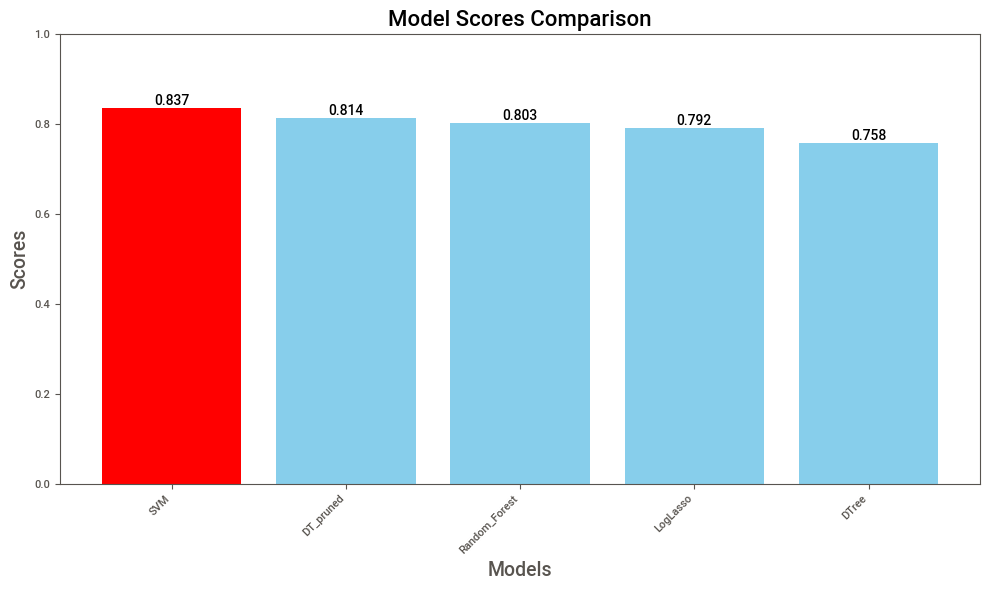

In [85]:
#### Model comparison #####
import matplotlib.pyplot as plt
import numpy as np
# Hard coded model scores since it was easier than rerunning altogether
model_scores = {'SVM': 0.837, 'LogLasso': 0.792, 'DTree': 0.758, 
                'DT_pruned': 0.814, 'Random_Forest': 0.803}

# descending order
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)
models, scores = zip(*sorted_scores)

# color list (all blue except the highest score which is red)
colors = ['red' if score == max(scores) else 'skyblue' for score in scores]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, scores, color=colors)

# legends
plt.title('Model Scores Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1

### Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()